# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | birao
Processing Record 2 of Set 1 | mpongwe
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | shimoda
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | dianopolis
City not found. Skipping...
Processing Record 8 of Set 1 | rio bueno
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | promyshlennovskiy
Processing Record 11 of Set 1 | launceston
Processing Record 12 of Set 1 | lazaro cardenas
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | llanes
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | uruzgan
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | codajas
Processing Record 21 of Set 1 | ilave
Processing Record 22 of Set 1 | hithadhoo
Proc

Processing Record 36 of Set 4 | hualmay
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | roma
Processing Record 40 of Set 4 | coffs harbour
Processing Record 41 of Set 4 | ajaccio
Processing Record 42 of Set 4 | belomorsk
Processing Record 43 of Set 4 | poum
Processing Record 44 of Set 4 | cockburn town
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | tahe
Processing Record 47 of Set 4 | brae
Processing Record 48 of Set 4 | puerto madryn
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | tilichiki
Processing Record 1 of Set 5 | simplicio mendes
Processing Record 2 of Set 5 | tokur
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | santo angelo
Processing Record 5 of Set 5 | playia
City not found. Skipping...
Processing Record 6 of Set 5 | atar
Processing Record 7 of Set 5 | malanje
Processing Record 8 of Set 5 | san patricio
Pro

Processing Record 29 of Set 8 | honningsvag
Processing Record 30 of Set 8 | montepuez
Processing Record 31 of Set 8 | corpus christi
Processing Record 32 of Set 8 | vila velha
Processing Record 33 of Set 8 | victor harbor
Processing Record 34 of Set 8 | matagami
Processing Record 35 of Set 8 | lieksa
Processing Record 36 of Set 8 | upernavik
Processing Record 37 of Set 8 | sistranda
Processing Record 38 of Set 8 | moron
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 8 | kuzhener
Processing Record 42 of Set 8 | veraval
Processing Record 43 of Set 8 | santa marta
Processing Record 44 of Set 8 | la ligua
Processing Record 45 of Set 8 | apollona
City not found. Skipping...
Processing Record 46 of Set 8 | miles city
Processing Record 47 of Set 8 | tazovskiy
Processing Record 48 of Set 8 | rantepao
Processing Record 49 of Set 8 | guerrero negro
Processing Record 0 of Set 9 | khairagarh
Processing 

Processing Record 17 of Set 12 | bam
Processing Record 18 of Set 12 | morki
Processing Record 19 of Set 12 | south yuba city
Processing Record 20 of Set 12 | bikaner
Processing Record 21 of Set 12 | visconde do rio branco
Processing Record 22 of Set 12 | aksu
Processing Record 23 of Set 12 | chumphon
Processing Record 24 of Set 12 | shenxian
Processing Record 25 of Set 12 | monroe
Processing Record 26 of Set 12 | campos novos
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 29 of Set 12 | daxian
City not found. Skipping...
Processing Record 30 of Set 12 | meulaboh
Processing Record 31 of Set 12 | nuuk
Processing Record 32 of Set 12 | black river
Processing Record 33 of Set 12 | tidore
City not found. Skipping...
Processing Record 34 of Set 12 | benguela
Processing Record 35 of Set 12 | chaykovskaya
Processing Record 36 of Set 12 | yakeshi
Processing Record 37 of Set 12 | auki
Processing Record 38 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,birao,10.2849,22.7882,91.27,19,94,4.81,CF,1667572435
1,mpongwe,-13.5091,28.1550,83.98,30,93,1.36,ZM,1667572435
2,ushuaia,-54.8000,-68.3000,47.86,76,75,20.71,AR,1667572229
3,new norfolk,-42.7826,147.0587,53.71,69,82,0.76,AU,1667571957
4,shimoda,34.6667,138.9500,56.10,86,77,20.20,JP,1667572229


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,birao,10.2849,22.7882,91.27,19,94,4.81,CF,1667572435
1,mpongwe,-13.5091,28.1550,83.98,30,93,1.36,ZM,1667572435
2,ushuaia,-54.8000,-68.3000,47.86,76,75,20.71,AR,1667572229
3,new norfolk,-42.7826,147.0587,53.71,69,82,0.76,AU,1667571957
4,shimoda,34.6667,138.9500,56.10,86,77,20.20,JP,1667572229


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

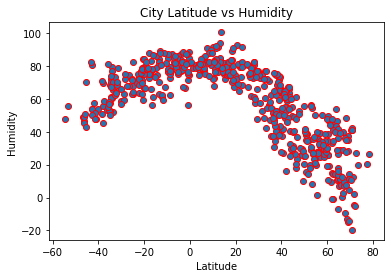

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="r")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

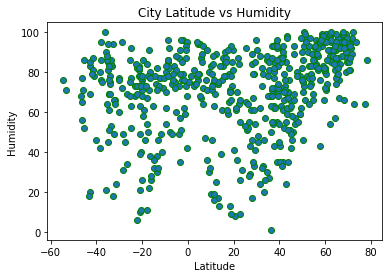

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="g")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

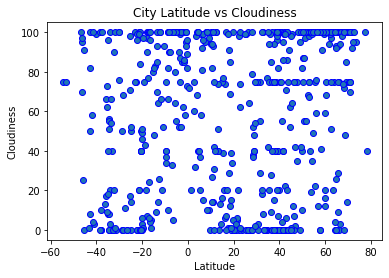

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

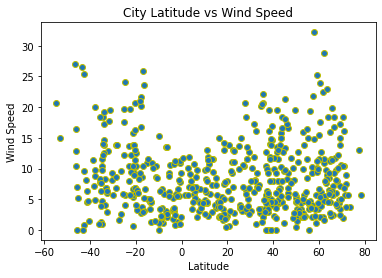

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="y")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.436470


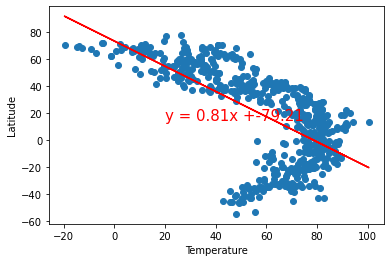

In [46]:
# Define a function to create Linear Regression plots

# Perform a linear regression on temperature vs. latitude
x = city_data_df["Max Temp"]
y = city_data_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,birao,10.2849,22.7882,91.27,19,94,4.81,CF,1667572435
4,shimoda,34.6667,138.9500,56.10,86,77,20.20,JP,1667572229
8,promyshlennovskiy,55.4833,86.2000,27.37,83,22,3.33,RU,1667572437
10,lazaro cardenas,17.9583,-102.2000,79.43,79,91,3.33,MX,1667572438
11,albany,42.6001,-73.9662,58.59,73,22,4.36,US,1667572236


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mpongwe,-13.5091,28.1550,83.98,30,93,1.36,ZM,1667572435
2,ushuaia,-54.8000,-68.3000,47.86,76,75,20.71,AR,1667572229
3,new norfolk,-42.7826,147.0587,53.71,69,82,0.76,AU,1667571957
5,hobart,-42.8794,147.3294,54.05,83,100,0.00,AU,1667572243
6,rio bueno,-40.3167,-72.9667,53.74,46,99,1.48,CL,1667572436


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.742736


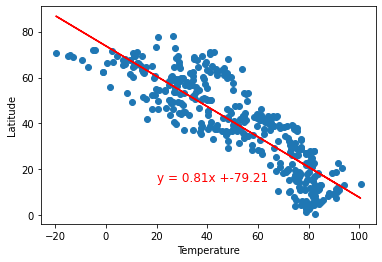

In [47]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df["Max Temp"]
y = northern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

The r-value is: 0.469182


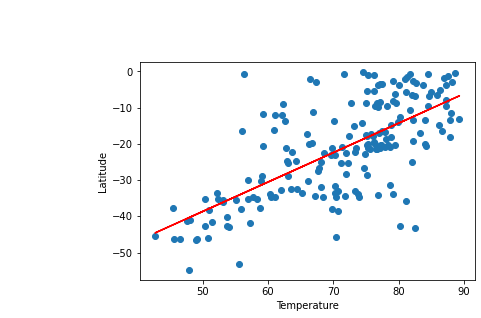

In [49]:
# Linear regression on Southern Hemisphere

x = southern_hemi_df["Max Temp"]
y = southern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has much stronger coloration to it's latitude and temperature change for the date this data was pulled. The further away from the center (Lat = 0) the lower the temperatures value.   The Northern Hemisphere has an r-value of of 0.74, considered with a strong correlation where the Southern Hemisphere has an r-value of .46, which is considered weak. The Southern Hemisphere r-value would likely be stronger in the summer months but that data would need to be evaluated to confirm. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.144938


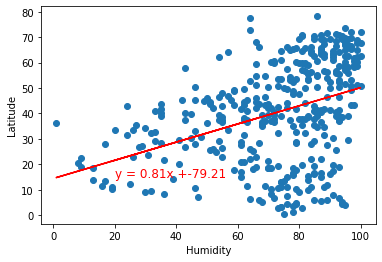

In [50]:
# Northern Hemisphere

x = northern_hemi_df["Humidity"]
y = northern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()


The r-value is: 0.001676


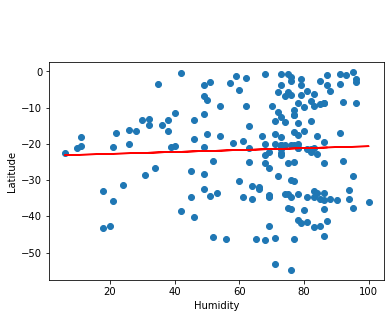

In [51]:
# Southern Hemisphere
x = southern_hemi_df["Humidity"]
y = southern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no significant relationship between the latitude the humidity but there is currently a stronger relationship in the Northern Hempisphere compared to the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.075015


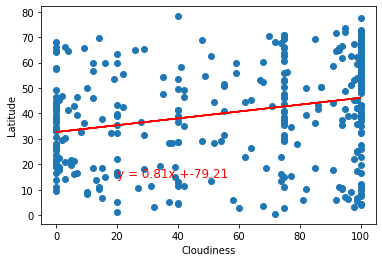

In [52]:
# Northern Hemisphere
x = northern_hemi_df["Cloudiness"]
y = northern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

The r-value is: 0.089509


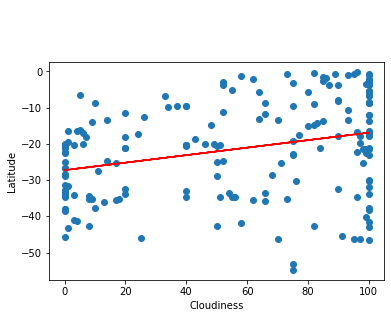

In [53]:
# Southern Hemisphere
x = southern_hemi_df["Cloudiness"]
y = southern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no significant relationship between latitude and cloud cover and both the Northern and Southern Hempisphere are closely related with an delta in R value at ~0.01. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018677


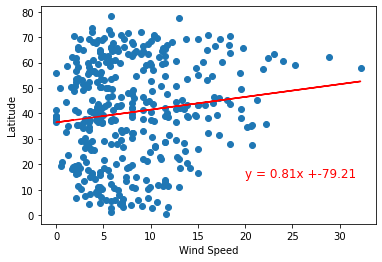

In [54]:
# Northern Hemisphere
x = northern_hemi_df["Wind Speed"]
y = northern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

The r-value is: 0.087716


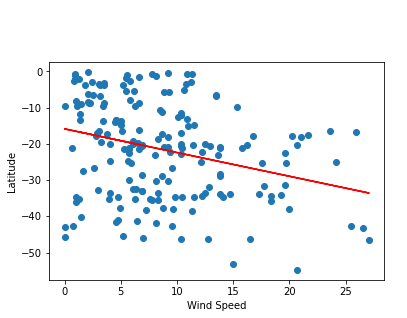

In [55]:
# Southern Hemisphere
x = southern_hemi_df["Wind Speed"]
y = southern_hemi_df["Lat"]

# Perform a linear regression on temperature vs. latitude

# Get regression values
regress_values = linregress(x, y)

plt.scatter(x,y)

plt.plot(x,regress_values.intercept + regress_values.slope*x,"r")

plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.annotate(line_eq,(20,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {regress_values.rvalue**2:.6f}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no significant relationship between Latitude and Wind Speed. When comparing the Northern and Southern Hemisphere, there is a positive correlation between wind speed and it's delta from 0-Lat (wind speeds go up) in the Northern Hemisphere.  Where in the Southern Hemisphere there is a negative correlation between wind speed and it's delta from 0-lat (wind speeds go down). 